In [6]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules




In [4]:
Data = pd.read_csv('markets_products_orders.csv',delimiter=',')
Data.columns

Index(['food_id', 'ID_commande', 'Point_de_vente', 'Designation_article',
       'Prix_de_vente_unitaire', 'quantite', 'jour_de_la_commande', 'hour',
       'main_category', 'sous_famille', 'barcode'],
      dtype='object')

In [ ]:
# Define the minimum support threshold (e.g., 0.1, meaning 10% of transactions)
min_support = 0.1

# Generate frequent itemsets
frequent_itemsets = apriori(Data, min_support=min_support, use_colnames=True)


In [ ]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)


In [ ]:
# View frequent itemsets
print(frequent_itemsets)

# View association rules
print(rules)


In [42]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
#data = pd.read_csv('markets_products_orders.csv')
data = pd.read_excel('data_market_preprocessed.xlsx',sheet_name='Feuil17')


# Data preprocessing: Create a basket of items using 'food_id'
basket = data.groupby(['ID_commande', 'products'])['quantite'].sum().unstack().reset_index().fillna(0).set_index('ID_commande')

# Convert quantities to binary values (1 if an item was in the order, 0 if not)
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

# Apply the Apriori algorithm
min_support = 0.05 # Adjust the support threshold as needed
frequent_itemsets = apriori(basket_sets, min_support=min_support, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# View frequent itemsets and association rules
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)


# Create a DataFrame to save the frequent itemsets
frequent_itemsets_df = pd.DataFrame(frequent_itemsets)

# Save the DataFrame to a CSV file
frequent_itemsets_df.to_csv('frequent_itemsets2.csv', index=False)


Frequent Itemsets:
      support                                           itemsets
0    0.058824                     (ALADIN fromage frais abricot)
1    0.058824                               (AYRIS  Eau minéral)
2    0.058824                            (AZRA Sauce algérienne)
3    0.058824                    (BELIEDELICE Biscuit duo molto)
4    0.058824                         (BEN HAROUNE Eau gazifier)
..        ...                                                ...
127  0.058824  (CANDIA Candy Choco, OIKOS Yaourt fraise , COC...
128  0.058824  (CANDIA Candy Choco, OIKOS Yaourt fraise , ELI...
129  0.058824  (OIKOS Yaourt fraise , ELIO Huile de table, CO...
130  0.058824  (RÉGALO Biscuit digestive Cacao, MAXON Cookies...
131  0.058824  (COCA COLA  Soda, ELIO Huile de table, OIKOS y...

[132 rows x 2 columns]

Association Rules:
                          antecedents  \
0       (MAXON Cookies pepite family)   
1             (AZRA Sauce algérienne)   
2             (MAXON Pate a tartin

c:\Users\yassir\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


c:\Users\yassir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


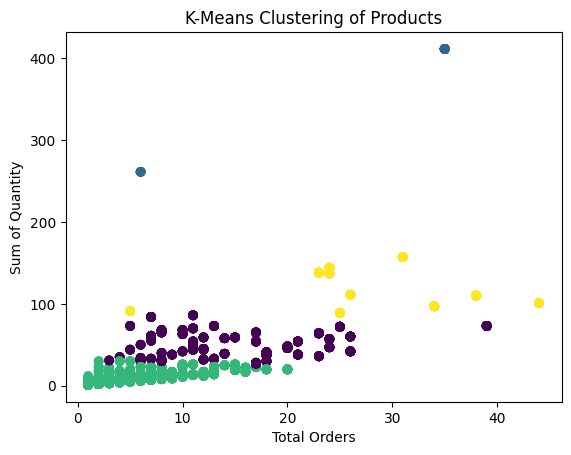

In [38]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your data into a DataFrame (replace 'your_dataset.csv' with the actual file path)
data = pd.read_excel('data_market_preprocessed.xlsx',sheet_name='Feuil2')

# Calculate the total number of orders by 'food_id'
total_orders = data.groupby('food_id')['ID_commande'].nunique().reset_index()
total_orders.rename(columns={'ID_commande': 'Total_Orders'}, inplace=True)

# Calculate the sum of quantities by 'food_id'
sum_of_quantity = data.groupby('food_id')['quantite'].sum().reset_index()
sum_of_quantity.rename(columns={'quantite': 'Sum_of_Quantity'}, inplace=True)

# Merge the dataframes on 'food_id'
merged_data = pd.merge(total_orders, sum_of_quantity , on='food_id')
# Merge 'Designation_article' and 'main_category' based on 'food_id'
merged_data = pd.merge(merged_data, data[['food_id','products','main_category']], on='food_id')

# Select features for clustering
features = merged_data[['Total_Orders', 'Sum_of_Quantity']]

# Choose the number of clusters (K) - adjust as needed
K = 4 # Example: 3 clusters

# Perform K-Means clustering
kmeans = KMeans(n_clusters=K, random_state=0)
merged_data['Cluster'] = kmeans.fit_predict(features)

clustered_data = merged_data.copy()  # Create a copy of the merged data with cluster labels
# Save the DataFrame to a CSV file
clustered_data.to_csv('clustered_data.csv', index=False)

# Scatter plot to visualize the clusters
plt.scatter(clustered_data['Total_Orders'], clustered_data['Sum_of_Quantity'], c=clustered_data['Cluster'])
plt.xlabel('Total Orders')
plt.ylabel('Sum of Quantity')
plt.title('K-Means Clustering of Products')
plt.show()


In [64]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

data = pd.read_excel('data_market_preprocessed.xlsx',sheet_name='Data')

# Data preprocessing: Create a basket of items using 'Designation_article'

basket = data.groupby(['ID_commande', 'products'])['quantite'].sum().unstack().reset_index().fillna(0).set_index('ID_commande')

# Convert quantities to binary values (1 if an item was in the order, 0 if not)
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

# Adjust the support threshold (you can adjust this as needed)
min_support = 0.015  # Lower the threshold
frequent_itemsets = fpgrowth(basket_sets, min_support=min_support, use_colnames=True)

# Generate association rules (if needed)
# rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# View frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Create a DataFrame to save the frequent itemsets
#frequent_itemsets_df = pd.DataFrame(frequent_itemsets)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules
rules_fpgrowth=pd.DataFrame(rules)
rules_fpgrowth.to_csv('rulesfpgrowth.csv', index=False)
# Save the DataFrame to a CSV file
#frequent_itemsets_df.to_csv('frequent_itemsetsfpgrowth.csv', index=False)

Frequent Itemsets:
      support                                           itemsets
0    0.047423                 (CANDIA lait partiellement ecrémé)
1    0.057732                                    (SOMMAM Nature)
2    0.047423                       (COCO RICO Barquette d'œufs)
3    0.022680                     (CHIUAUA Graines de tournesol)
4    0.022680                      (KOOL Gaufrette fourée enjoy)
..        ...                                                ...
467  0.018557  (SOUMMAM creme dessert flan, TASSILI yaourt a ...
468  0.016495      (TASSILI yaourt a boire, BIMO Galette senior)
469  0.016495      (TASSILI yaourt a boire, MAXON Chocolat noir)
470  0.016495  (SOUMMAM creme dessert flan, TASSILI yaourt a ...
471  0.016495  (SOUMMAM creme dessert flan, TASSILI yaourt a ...

[472 rows x 2 columns]


c:\Users\yassir\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
